# LSS applied to backbone generation of Alanine dipeptide (ADP)

## Load the different components from their respective repos

In [1]:
from mdn_propagator.propagator import Propagator
from molgen.models import WGANGP
from snrv import Snrv

### Other dependencies

In [2]:
import mdtraj as md
from pathlib import Path
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load and prep data

In [3]:
trj_fnames = sorted([str(i) for i in Path('data_mdshare/').glob('alanine-dipeptide-*-250ns-nowater.xtc')])
top_fname = 'data_mdshare/alanine-dipeptide-nowater.pdb'

In [4]:
trjs = [md.load(t, top=top_fname).center_coordinates() for t in trj_fnames]
trjs

[<mdtraj.Trajectory with 250000 frames, 22 atoms, 3 residues, and unitcells at 0x7fb97d28ef70>,
 <mdtraj.Trajectory with 250000 frames, 22 atoms, 3 residues, and unitcells at 0x7fb97d247310>,
 <mdtraj.Trajectory with 250000 frames, 22 atoms, 3 residues, and unitcells at 0x7fb97d23d340>]

In [5]:
coords_torch = list()
for trj in trjs:
    #t_backbone = trj.atom_slice(trj.top.select('backbone')).center_coordinates()
    #pdists = [torch.pdist(p)[None] for p in torch.tensor(t_backbone.xyz)]
    pdists = [torch.pdist(p)[None] for p in torch.tensor(trj.xyz)]
    coords_torch.append(torch.cat(pdists))
len(coords_torch), coords_torch[0].shape

(3, torch.Size([250000, 231]))

In [6]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# SRV fitting

In [7]:
from snrv.utils import set_random_seed

In [8]:
set_random_seed(42)

Setting random seed to 42


In [9]:
input_size = coords_torch[0].size()[1]
output_size = 3
hidden_depth = 2
hidden_size = 100
batch_norm = True
dropout_rate = 0.0
lr = 1E-2
weight_decay = 0.0
val_frac = 0.05
n_epochs = 50
batch_size = 25000
VAMPdegree = 2
is_reversible = True
num_workers = 0

model_snrv = Snrv(input_size, output_size, hidden_depth=hidden_depth, hidden_size=hidden_size,
            batch_norm=batch_norm, dropout_rate=dropout_rate, lr=lr, weight_decay=weight_decay, 
            val_frac=val_frac, n_epochs=n_epochs, batch_size=batch_size, 
            VAMPdegree=VAMPdegree,is_reversible=is_reversible, num_workers=num_workers,
            activation=torch.nn.GELU(), device=device)
model_snrv = model_snrv.to(device)

In [10]:
lag_n = 10

In [11]:
model_snrv.fit(coords_torch, lag=lag_n, scheduler=0.9)

Epoch 0: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  2.92batch/s]


[Epoch 0]	 training loss = -2.278	 validation loss = -2.430


Epoch 1: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:08<00:00,  3.22batch/s]


[Epoch 1]	 training loss = -2.494	 validation loss = -2.515


Epoch 2: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.17batch/s]


[Epoch 2]	 training loss = -2.689	 validation loss = -2.628


Epoch 3: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:08<00:00,  3.24batch/s]


[Epoch 3]	 training loss = -2.717	 validation loss = -2.712


Epoch 4: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.16batch/s]


[Epoch 4]	 training loss = -2.722	 validation loss = -2.718


Epoch 5: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:08<00:00,  3.24batch/s]


[Epoch 5]	 training loss = -2.724	 validation loss = -2.720


Epoch 6: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.14batch/s]


[Epoch 6]	 training loss = -2.725	 validation loss = -2.720


Epoch 7: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.17batch/s]


[Epoch 7]	 training loss = -2.726	 validation loss = -2.722


Epoch 8: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.14batch/s]


[Epoch 8]	 training loss = -2.727	 validation loss = -2.721


Epoch 9: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:08<00:00,  3.22batch/s]


[Epoch 9]	 training loss = -2.727	 validation loss = -2.722


Epoch 10: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.11batch/s]


[Epoch 10]	 training loss = -2.728	 validation loss = -2.722


Epoch 11: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.20batch/s]


[Epoch 11]	 training loss = -2.728	 validation loss = -2.723


Epoch 12: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.14batch/s]


[Epoch 12]	 training loss = -2.728	 validation loss = -2.723


Epoch 13: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.18batch/s]


[Epoch 13]	 training loss = -2.728	 validation loss = -2.723


Epoch 14: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.16batch/s]


[Epoch 14]	 training loss = -2.728	 validation loss = -2.723


Epoch 15: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.21batch/s]


[Epoch 15]	 training loss = -2.728	 validation loss = -2.723


Epoch 16: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.10batch/s]


[Epoch 16]	 training loss = -2.728	 validation loss = -2.723


Epoch 17: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.18batch/s]


[Epoch 17]	 training loss = -2.728	 validation loss = -2.723


Epoch 18: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.13batch/s]


[Epoch 18]	 training loss = -2.728	 validation loss = -2.723


Epoch 19: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.15batch/s]


[Epoch 19]	 training loss = -2.728	 validation loss = -2.723


Epoch 20: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.12batch/s]


[Epoch 20]	 training loss = -2.728	 validation loss = -2.723


Epoch 21: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.19batch/s]


[Epoch 21]	 training loss = -2.728	 validation loss = -2.724


Epoch 22: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.08batch/s]


[Epoch 22]	 training loss = -2.728	 validation loss = -2.724


Epoch 23: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.19batch/s]


[Epoch 23]	 training loss = -2.728	 validation loss = -2.724


Epoch 24: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.13batch/s]


[Epoch 24]	 training loss = -2.729	 validation loss = -2.724


Epoch 25: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.18batch/s]


[Epoch 25]	 training loss = -2.729	 validation loss = -2.724


Epoch 26: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.10batch/s]


[Epoch 26]	 training loss = -2.729	 validation loss = -2.724


Epoch 27: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.16batch/s]


[Epoch 27]	 training loss = -2.729	 validation loss = -2.724


Epoch 28: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.09batch/s]


[Epoch 28]	 training loss = -2.729	 validation loss = -2.724


Epoch 29: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.16batch/s]


[Epoch 29]	 training loss = -2.729	 validation loss = -2.724


Epoch 30: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.12batch/s]


[Epoch 30]	 training loss = -2.729	 validation loss = -2.724


Epoch 31: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.19batch/s]


[Epoch 31]	 training loss = -2.729	 validation loss = -2.724


Epoch 32: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.07batch/s]


[Epoch 32]	 training loss = -2.729	 validation loss = -2.724


Epoch 33: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.15batch/s]


[Epoch 33]	 training loss = -2.729	 validation loss = -2.724


Epoch 34: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.10batch/s]


[Epoch 34]	 training loss = -2.729	 validation loss = -2.724


Epoch 35: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.16batch/s]


[Epoch 35]	 training loss = -2.729	 validation loss = -2.724


Epoch 36: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.11batch/s]


[Epoch 36]	 training loss = -2.729	 validation loss = -2.724


Epoch 37: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.16batch/s]


[Epoch 37]	 training loss = -2.729	 validation loss = -2.724


Epoch 38: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.09batch/s]


[Epoch 38]	 training loss = -2.729	 validation loss = -2.724


Epoch 39: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.17batch/s]


[Epoch 39]	 training loss = -2.729	 validation loss = -2.724


Epoch 40: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.11batch/s]


[Epoch 40]	 training loss = -2.729	 validation loss = -2.724


Epoch 41: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.12batch/s]


[Epoch 41]	 training loss = -2.729	 validation loss = -2.724


Epoch 42: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.11batch/s]


[Epoch 42]	 training loss = -2.729	 validation loss = -2.724


Epoch 43: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.17batch/s]


[Epoch 43]	 training loss = -2.729	 validation loss = -2.724


Epoch 44: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.10batch/s]


[Epoch 44]	 training loss = -2.729	 validation loss = -2.724


Epoch 45: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.17batch/s]


[Epoch 45]	 training loss = -2.729	 validation loss = -2.724


Epoch 46: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.07batch/s]


[Epoch 46]	 training loss = -2.729	 validation loss = -2.724


Epoch 47: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.13batch/s]


[Epoch 47]	 training loss = -2.729	 validation loss = -2.724


Epoch 48: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.13batch/s]


[Epoch 48]	 training loss = -2.729	 validation loss = -2.724


Epoch 49: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.19batch/s]


[Epoch 49]	 training loss = -2.729	 validation loss = -2.724


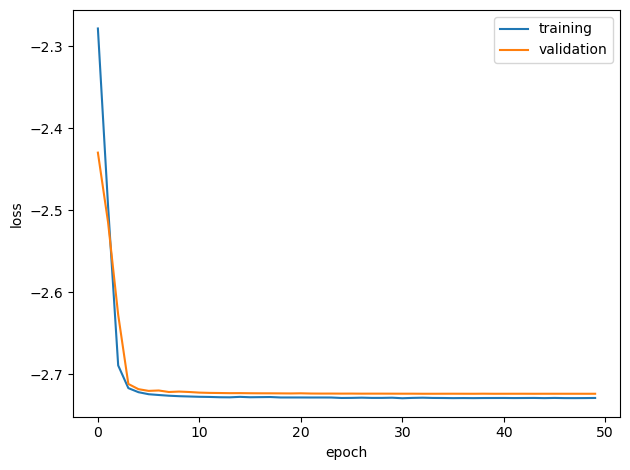

In [12]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(model_snrv.training_losses)), model_snrv.training_losses)
ax.plot(np.arange(len(model_snrv.validation_losses)), model_snrv.validation_losses)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend(['training','validation'])
fig.tight_layout()

In [13]:
save_freq = 1 # ps

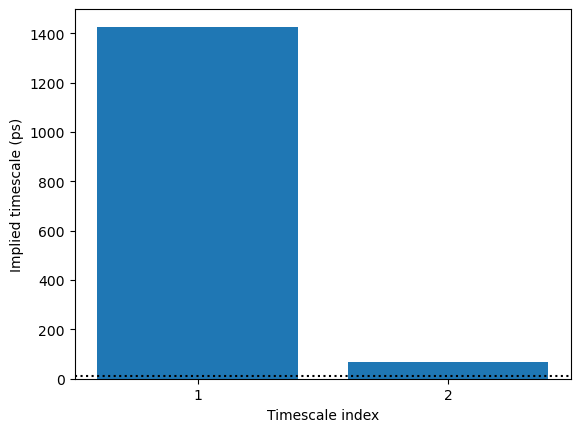

In [14]:
evals = model_snrv.evals.cpu().detach().numpy()
plt.bar(range(1,evals.size), -lag_n*save_freq/np.log(evals[1:]))
plt.ylabel('Implied timescale (ps)')
plt.xticks(range(1,evals.size))
plt.xlabel('Timescale index')
plt.axhline(lag_n*save_freq, color='k', linestyle=':')

In [15]:
model_snrv.eval()

Snrv(
  (activation): GELU(approximate=none)
  (model): Sequential(
    (0): Linear(in_features=231, out_features=100, bias=True)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): GELU(approximate=none)
    (3): Linear(in_features=100, out_features=100, bias=True)
    (4): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): GELU(approximate=none)
    (6): Linear(in_features=100, out_features=3, bias=True)
  )
)

In [16]:
evecs = model_snrv.transform(torch.cat(coords_torch)).cpu().detach().numpy()

In [17]:
trj_cat = md.join(trjs)

In [18]:
phi = md.compute_phi(trj_cat)[1].flatten()
psi = md.compute_psi(trj_cat)[1].flatten()

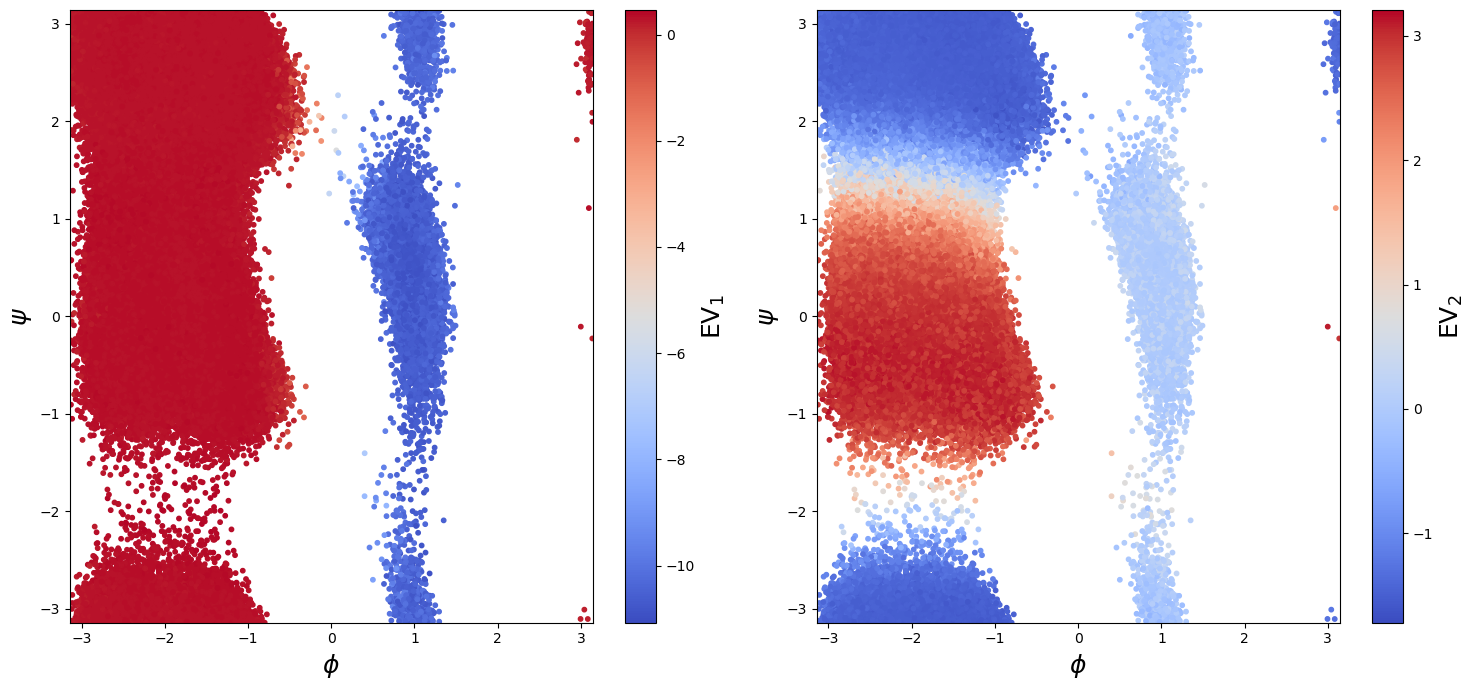

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (15, 7))
axes = axes.flatten()

for e in range(1, evecs.shape[1]):
    evec = evecs[:, e]
    ax = axes[e-1]
    
    im = ax.scatter(phi, psi, c=evec, s=10, cmap='coolwarm')
    ax.set_xlabel('$\phi$', fontsize=18)
    ax.set_ylabel('$\psi$', fontsize=18)
    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(-np.pi, np.pi)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(f'EV$_{e}$', size=18)

plt.tight_layout()

In [20]:
CVs = [model_snrv.transform(x).cpu().detach()[:, 1:] for x in coords_torch]
CVs[0].shape, len(CVs)

(torch.Size([250000, 2]), 3)

# MDN propagator

In [21]:
model_mdn = Propagator(dim = CVs[0].size(1))

In [22]:
model_mdn.fit(CVs, lag = 10, max_epochs=25)

/project/andrewferguson/Kirill/env_lss/lib/python3.8/site-packages/lightning_lite/plugins/environments/slurm.py:167: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /project/andrewferguson/Kirill/env_lss/lib/python3.8 ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type                  | Params
--------------------------------------------------
0 | mdn     | MixtureDensityNetwork | 33.0 K
1 | _scaler | MinMaxScaler          | 0     
--------------------------------------------------
33.0 K    Trainable params
0         Non-trainable params
33.0 K    Total params
0.132     Total estimated model params size (MB)
/project/andrewferguson/Kirill/env_lss/lib/pyt

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=25` reached.


Propagator(
  (mdn): MixtureDensityNetwork(
    (network): MLP(
      (mlp): Sequential(
        (0): Linear(in_features=2, out_features=128, bias=True)
        (1): SiLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
        (3): SiLU()
        (4): Linear(in_features=128, out_features=125, bias=True)
      )
    )
  )
  (_scaler): MinMaxScaler()
)

In [23]:
n_steps = int(1E5)
x = CVs[0][0][None]
synthetic_traj_CVs = model_mdn.gen_synthetic_traj(x, n_steps)

  0%|          | 0/100000 [00:00<?, ?it/s]

# WGANGP Decoder

In [24]:
xyz = list()
for trj in trjs:
    
    t_backbone = trj.atom_slice(trj.top.select('backbone')).center_coordinates()
    
    n = trj.xyz.shape[0]

    xyz.append(torch.tensor(t_backbone.xyz.reshape(n, -1)).float())

In [25]:
model_gan = WGANGP(xyz[0].shape[1], CVs[0].shape[1])

In [26]:
model_gan.fit(xyz, CVs, max_epochs=25)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type                | Params
----------------------------------------------------------
0 | generator         | SimpleGenerator     | 172 K 
1 | discriminator     | SimpleDiscriminator | 138 K 
2 | _feature_scaler   | MinMaxScaler        | 0     
3 | _condition_scaler | MinMaxScaler        | 0     
----------------------------------------------------------
311 K     Trainable params
0         Non-trainable params
311 K     Total params
1.246     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=25` reached.


WGANGP(
  (generator): SimpleGenerator(
    (model): Sequential(
      (0): Linear(in_features=130, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU()
      (3): Linear(in_features=256, out_features=256, bias=True)
      (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): SiLU()
      (6): Linear(in_features=256, out_features=256, bias=True)
      (7): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): SiLU()
      (9): Linear(in_features=256, out_features=24, bias=True)
      (10): Tanh()
    )
  )
  (discriminator): SimpleDiscriminator(
    (model): Sequential(
      (0): Linear(in_features=26, out_features=256, bias=True)
      (1): SiLU()
      (2): Linear(in_features=256, out_features=256, bias=True)
      (3): SiLU()
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): SiLU()
      (6): 

# Decode synthetic traj

In [27]:
xyz_gen = model_gan.generate(synthetic_traj_CVs)

In [30]:
xyz_gen = xyz_gen.reshape(xyz_gen.size(0), -1 , 3).numpy()
fake_trj = md.Trajectory(xyz = xyz_gen, topology=t_backbone.top)

# Visualize results

In [31]:
import nglview as nv

In [32]:
v = nv.show_mdtraj(fake_trj)
v

NGLWidget(max_frame=99999)

In [33]:
fake_trj.save_pdb('ADP_backbone_synthetic_traj.pdb')